<a href="https://colab.research.google.com/github/SuzaDamaRoja/CIENCIAS_DATOS/blob/main/Taller_2_Introducci%C3%B3n_a_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANÁLISIS EXPLORATORIO DE DATOS - EDA
"Conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos".

El EDA, de acuoerdo a Wickman y Çetinkaya-Rundel y Grolemund (2023) propone seguir los siguientes pasos:
1. **Realizar un análisis descriptivo de las variables**, con el fin de obtener una idea representativa de los datos.
2. **Re-ajustar tipos de variables** para que sean consistentes en el momento de realizar posteriores operaciones.
3. **Detectar y tratar datos ausentes**, que nos permitirá procesar adecuadamente las variables numéricas.
4. **Identificar datos atípicos y tratarlos de forma adecuada**. Esto mitigará la distorsión de futuros análisis estadísticos.
5. **Realizar un examen numérico y gráfico de las relaciones entre variables analizadas para determinar el grado de correlación entre ellas**

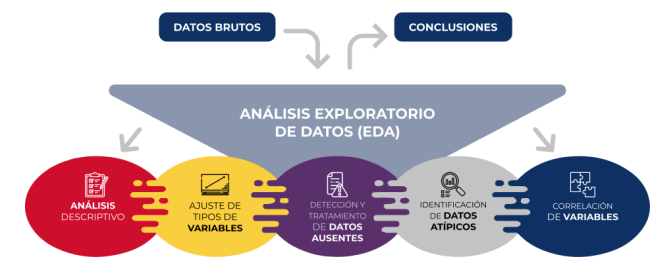

##TALLER
Para ello, realizaremos un ejercicio en el cuál se analizará estudiaremos el dataset de titanic con el fin de poder responder a la siguiente pregunta: Podría Jack sobrevivir al hundimiento del TITANIC (de acuerdo a lo arrojado por los datos).

Para ello, descargue el dataset de titanic y realice un análisis descriptivo de todos los datos posibles del dataset (emplee los conceptos ya aprendidos en el primer corte.

###ANÁLISIS DESCRIPTIVO

In [96]:
#Realice aquí su análisis descriptivo y emita sus conclusiones. Emplee todas las gráficas necesarias para poder emitir conclusiones con respecto a la tripulación del titanic.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('titanic.csv')

Cómo podemos llenar los datos nulos?

Los datos disponibles son suficientes para generar un modelo mínimo viable?

### AJUSTES DE VARIABLES
Observemos el dataset de TITANIC:
* La presentación de todas las variables es la adecuada? Si su respuesta es si, qué tipo de variable posee la feature Age?
AGE es una variable de tipo float. Queremos que sea de tipo entero. Genere un nuevo dataset con la característica AGE de tipo entero. Así mismo, revise que las características Survived y Pclass sean numéricas.

### DETECCIÓN Y TRATAMIENTO DE DATOS AUSENTES
Como se pudo observar, el dataset de titanic posee una cantidad de (llenar aquí con la información) datos nulos, los cuáles deben ser tratados para un posterior entendimiento de los datos. Ejecute las siguientes líneas de código para arreglar el dataset y explica los resultados obtenidos.

In [97]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [98]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [99]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [100]:
df.isnull().count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [101]:
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [102]:
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

,Total,Porcentaje
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [103]:
def plot_learning_curve(estimator,title,X,y,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - train_scores_std,
                     np.mean(train_scores, axis=1) + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt.show()

Explique línea por línea qué está haciendo la función plot_learning_curve (responda preguntas como, qué tipo de datos solicita, qué otros valores se pueden usar, cuál es su uso, etc.). También explique la gráfica obtenida.

El resultado de esta actividad debe subirse a GITHUB el día 7 de abril/2025 a las 5:00pm.
**Actividades subidas en la franja de 5:01pm a 11:59pm será evaluado sobre 4.0.**

**Actividades subidas después del 7 de abril pero antes de la siguiente clase serán evaluadas sobre 3.0.**


##Para investigar:
Formule una estrategia que permita llenar los datos nulos del dataset y empléelo. Ejemplo: cómo podría llenar los datos nulos de edades?

# DESARROLLO DEL TALLER

## Respuesta a las preguntas

1) Cómo podemos llenar los datos nulos?

*   Los datos nulos es posible llenarlos de diferentes maneras, en el caso de los datos numericos podemos realizar una clasificación y aproximar valor, pero ¿en qué sentido se haría  una?, dado que los datos dependen de diferentes factores una posible estrategia es separar los datos según el tipo de cabina y llenar los datos numericos con base a diferentes metodos, uno de ellos es reemplazar el valor nulo por la media de los datos analizados dentro de cada clase con la finalidad de mantener cierta congruencia entre los datos, así mismo sería importante verificar que la base de datos no se dañe al realizar este tipo de procesos utilizando pruebas con valores como el P-Value.

2)Los datos disponibles son suficientes para generar un modelo mínimo viable?

*   En el dataset se tienen 891 datos, por esta razón es posible afirmar que si se podría crear un modelo viable, sin embargo, su precisión depende de diferentes factores, uno de ellos es que tan bien se pueda realiar el preprocesamiento de la data que se tiene, de modo que se pueda entrenar adecuadamente al modelo predictor.

3) La presentación de todas las variables es la adecuada? Si su respuesta es si, qué tipo de variable posee la feature Age? AGE es una variable de tipo float. Queremos que sea de tipo entero. Genere un nuevo dataset con la característica AGE de tipo entero. Así mismo, revise que las características Survived y Pclass sean numéricas.

*   Para la creación del modelo se prefieren los datos numericos, por lo que aquellos datos categoricos que puedan resultar interesantes se deben preprocesar haciendo uso de técnicas como el one-hot encoding, de modo que no se generen sesgos en la información y no se pierdan datos en la base de datos a utilizar

*   Como se muestra más adelante en el archivo IPYNB, las variables Name, Ticket, Cabin, Embarked y Sex son categóricas, el nombre puede ser descartado junto con las variables ticket y cabien dado que no resultan interesantes para el modelo que se busca crear, pero para la feature Sex y embarked es necesario realizar un encoding que permita pasar el dato categórico a entero, con respecto a la variable Sex, se pueden crear dos nuevas columnas en su lugar, una para sexo masculino y otra para sexo femenino, donde los datos de cada fila serían 1 si pertenece a la variable y 0 si no pertenece a la variable. De igual manera para la variable Embarked ya que puede ser util conocer en donde embarcó el pasajero, aunque, es posible que este dato no sea relevante para determinar si vive o muere; esta ultima afirmación solo puede ser corroborada realizando pruebas.

*   Debido a lo anteriormente expuesto, es posible afirmar que previo al preprocesamiento del dataset no todas las variables están dispuestas de forma adecuada, adicionalmente existen muchos datos faltantes o NaN, o son del tipo inadecuado.

4) Como se pudo observar, el dataset de titanic posee una cantidad de datos nulos, los cuáles deben ser tratados para un posterior entendimiento de los datos. Ejecute las siguientes líneas de código para arreglar el dataset y explica los resultados obtenidos.

*   Se tiene datos nulos en las siguientes features: Cabin (687 datos nulos), Age	(177 datos nulos) y Embarked	(2 datos nulos)

5) Explique línea por línea qué está haciendo la función plot_learning_curve (responda preguntas como, qué tipo de datos solicita, qué otros valores se pueden usar, cuál es su uso, etc.). También explique la gráfica obtenida.

*    ¿Qué hace plot_learning_curve?: Grafica una curva de aprendizaje, mostrando cómo evoluciona la precisión del modelo en el conjunto de entrenamiento y validación a medida que se aumenta la cantidad de datos usados para entrenarlo.

*   Descripción de los parametros de la función plot_learning_curve:
  
  estimator: modelo que se quiere evaluar (por ejemplo: RandomForestClassifier()).

  title: título de la gráfica.

  X: variables independientes (features).

  y: variable objetivo (target).

  xlim: límite en el eje X para ajustar visualización (opcional).

  cv: número de particiones para validación cruzada (por ejemplo: 5).

  n_jobs: número de núcleos para paralelizar (-1 usa todos).

  train_sizes: fracciones del dataset que se usan para entrenar (aquí se usan 5 tamaños desde 10% hasta 100%).



*   plt.figure(): Crea una nueva figura para graficar.

*  plt.title(title): Asigna el título a la gráfica.

*     if ylim is not None: -> plt.ylim(*ylim): Si se especifica un límite en el eje Y (ylim), lo aplica.

*       plt.xlabel("Ejemplos de entrenamiento") y     plt.ylabel("Puntuación de validación"): Etiquetas para los ejes X e Y.


*   train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes): Llama a la función learning_curve de sklearn.model_selection y devuelve:

  train_sizes: número de muestras usadas en cada paso.

  train_scores: puntuaciones del modelo en los conjuntos de entrenamiento.

  test_scores: puntuaciones en validación cruzada (estimación de generalización).

*   train_scores_mean = np.mean(train_scores, axis=1),     train_scores_std = np.std(train_scores, axis=1),     test_scores_mean = np.mean(test_scores, axis=1) y    test_scores_std = np.std(test_scores, axis=1): Calcula el promedio y la desviación estándar de las puntuaciones de entrenamiento y validación para cada tamaño de muestra. Esto permite graficar una media con bandas de confianza.

*   plt.grid(): Muestra la grilla en el fondo del gráfico para facilitar la lectura.

*   plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r"): Rellena la región de confianza (±1 desviación estándar) para el entrenamiento. alpha=0.1 es la transparencia.

*   plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g"): Lo mismo que la línea anterior pero para la validación.

*   plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Puntuación de entrenamiento"): Dibuja la curva de la puntuación de entrenamiento.

*   plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de validación"): Dibuja la curva de validación.

*   plt.legend(loc="best"): Muestra la leyenda en la mejor posición automática.

*   return plt: Devuelve el objeto plt, por si se quiere seguir editando o mostrar con plt.show().

*   La versión mostrada del código no crea la gráfica y no se tienen los parametros para generarla, adicionalmente se debe ajustar el dataset ingresado a la función

6) Formule una estrategia que permita llenar los datos nulos del dataset y empléelo. Ejemplo: cómo podría llenar los datos nulos de edades?

*   Commo se explicó antes, una estrategia es generar sub grupos en la base de datos para posteriormente sacar el ptomedio de edad y este dato usarlo para reemplazar los missing-values













## Implementación de código
Importe de datos

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la base de datos
df = pd.read_csv('titanic.csv')

# Mostrar las primeras filas del DataFrame
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Revisión del tipo de datos empleados

In [105]:
# Función para clasificar tipos de datos
def clasificar_tipo(d):
    if pd.api.types.is_integer_dtype(d):
        return 'entero'
    elif pd.api.types.is_float_dtype(d):
        return 'float'
    elif pd.api.types.is_bool_dtype(d):
        return 'booleano'
    elif pd.api.types.is_object_dtype(d):
        return 'categórico'
    elif pd.api.types.is_datetime64_any_dtype(d):
        return 'fecha'
    else:
        return 'otro'

# Crear tabla de resumen
tipos_df = pd.DataFrame({
    'columna': df.columns,
    'dtype_original': [df[col].dtype for col in df.columns],
    'tipo_dato': [clasificar_tipo(df[col]) for col in df.columns]
})

# Mostrar tabla
tipos_df

,columna,dtype_original,tipo_dato
0,PassengerId,int64,entero
1,Survived,int64,entero
2,Pclass,int64,entero
3,Name,object,categórico
4,Sex,object,categórico
5,Age,float64,float
6,SibSp,int64,entero
7,Parch,int64,entero
8,Ticket,object,categórico
9,Fare,float64,float


Selección de variables

In [106]:
# Redondear hacia abajo y convertir a entero
df['Age'] = np.floor(df['Age']).astype('Int64')

# 1. Eliminamos las columnas que no usaremos
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# 2. Aplicamos One-Hot Encoding a las columnas categóricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Redondear hacia abajo y convertir a entero
df['Sex_male'] = np.floor(df['Sex_male']).astype('Int64')
df['Embarked_Q'] = np.floor(df['Embarked_Q']).astype('Int64')
df['Embarked_S'] = np.floor(df['Embarked_S']).astype('Int64')


# 3. Mostramos el nuevo DataFrame
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


In [107]:
# Crear tabla de resumen
tipos_df = pd.DataFrame({
    'columna': df.columns,
    'dtype_original': [df[col].dtype for col in df.columns],
    'tipo_dato': [clasificar_tipo(df[col]) for col in df.columns]
})

# Mostrar tabla
tipos_df

,columna,dtype_original,tipo_dato
0,Survived,int64,entero
1,Pclass,int64,entero
2,Age,Int64,entero
3,SibSp,int64,entero
4,Parch,int64,entero
5,Fare,float64,float
6,Sex_male,Int64,entero
7,Embarked_Q,Int64,entero
8,Embarked_S,Int64,entero


In [108]:
# Rellenar variables numéricas con la mediana
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Rellenar variables categóricas (object y dummies) con el valor más frecuente
for col in df.select_dtypes(include=['object', 'bool', 'category', 'uint8']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verificación final
print(df.isnull().sum())


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [109]:
df.head()



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


Se verifica que se hayan eliminado los missing-values

In [110]:
df.isnull()
df.isnull().sum()
total=df.isnull().sum().sort_values(ascending=False)
total
df.isnull().count()
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

,Total,Porcentaje
Survived,0,0.0
Pclass,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Sex_male,0,0.0
Embarked_Q,0,0.0
Embarked_S,0,0.0


Calculo de estadisticos

In [111]:
# Estadísticos generales para todas las variables numéricas
estadisticos = df.describe().T  # Transponer para que las variables estén en filas
print(estadisticos)


            count       mean        std  min     25%      50%   75%       max
Survived    891.0   0.383838   0.486592  0.0     0.0      0.0   1.0       1.0
Pclass      891.0   2.308642   0.836071  1.0     2.0      3.0   3.0       3.0
Age         891.0  29.345679  13.028212  0.0    22.0     28.0  35.0      80.0
SibSp       891.0   0.523008   1.102743  0.0     0.0      0.0   1.0       8.0
Parch       891.0   0.381594   0.806057  0.0     0.0      0.0   0.0       6.0
Fare        891.0  32.204208  49.693429  0.0  7.9104  14.4542  31.0  512.3292
Sex_male    891.0   0.647587    0.47799  0.0     0.0      1.0   1.0       1.0
Embarked_Q  891.0    0.08642   0.281141  0.0     0.0      0.0   0.0       1.0
Embarked_S  891.0   0.722783   0.447876  0.0     0.0      1.0   1.0       1.0


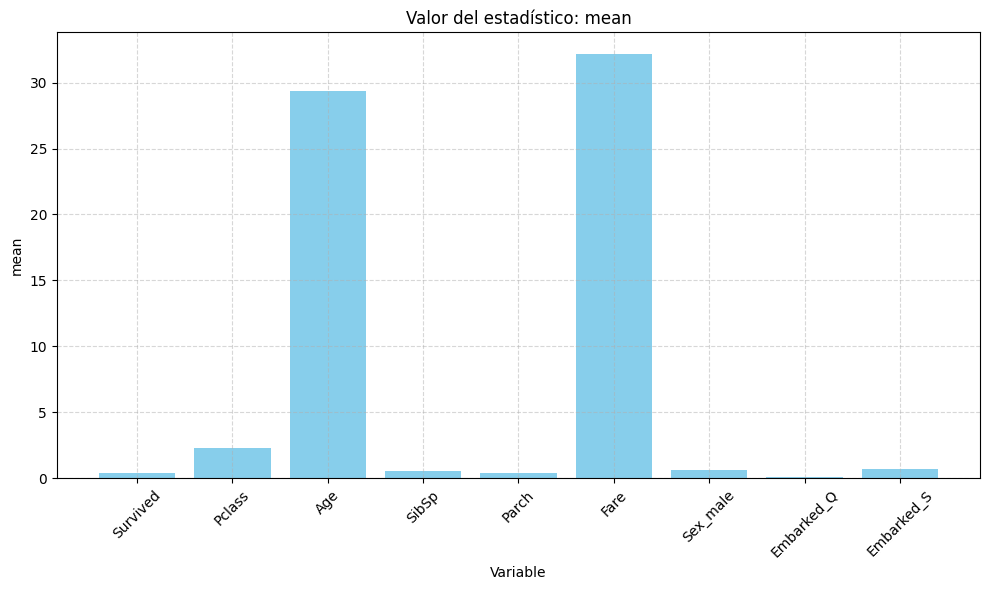

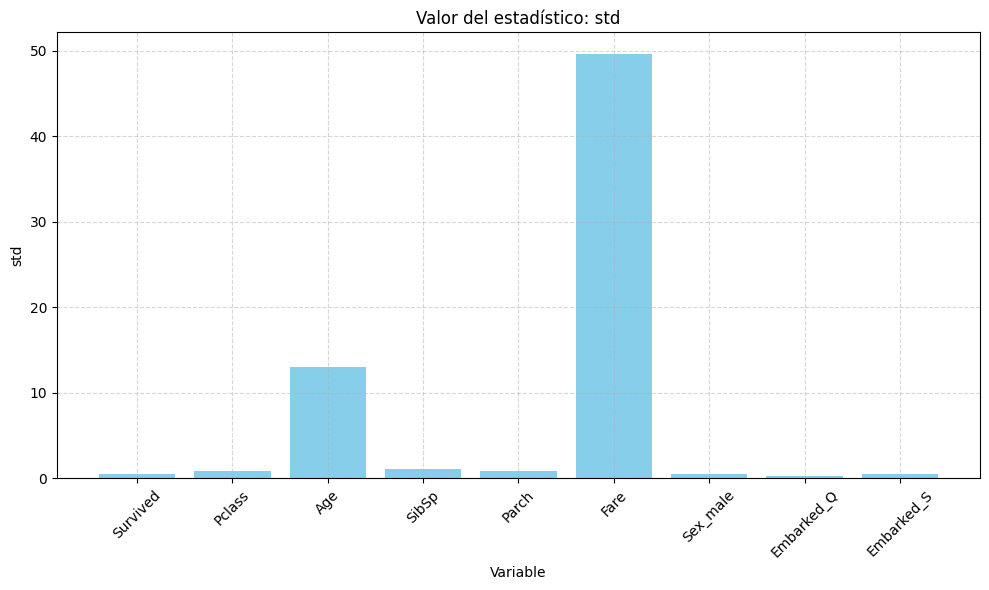

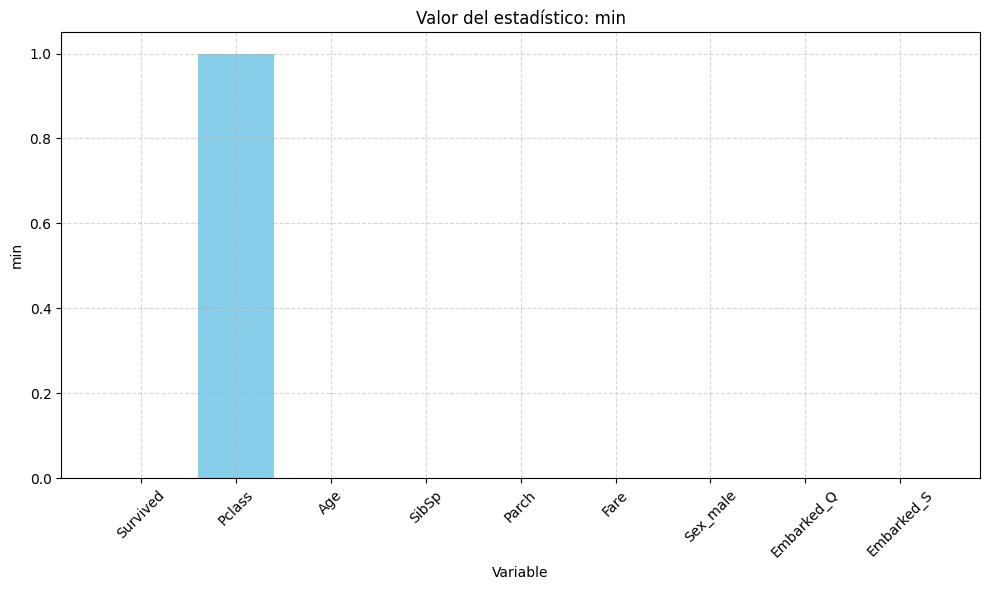

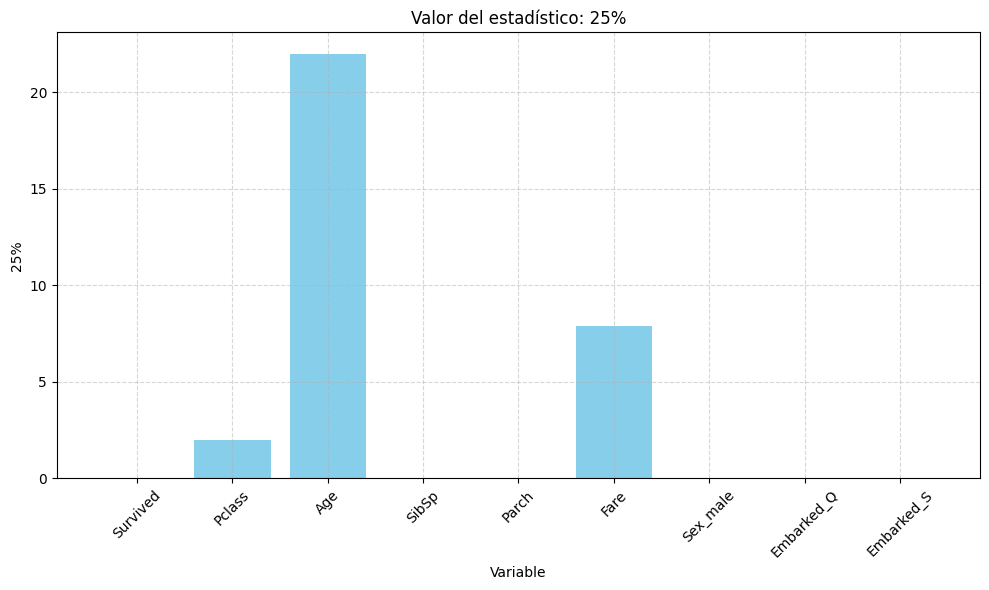

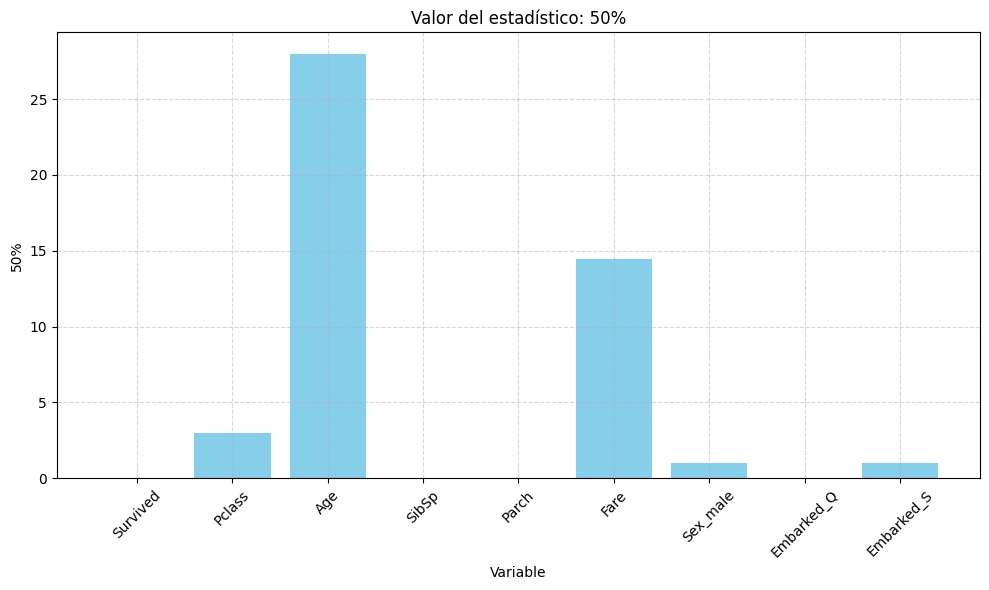

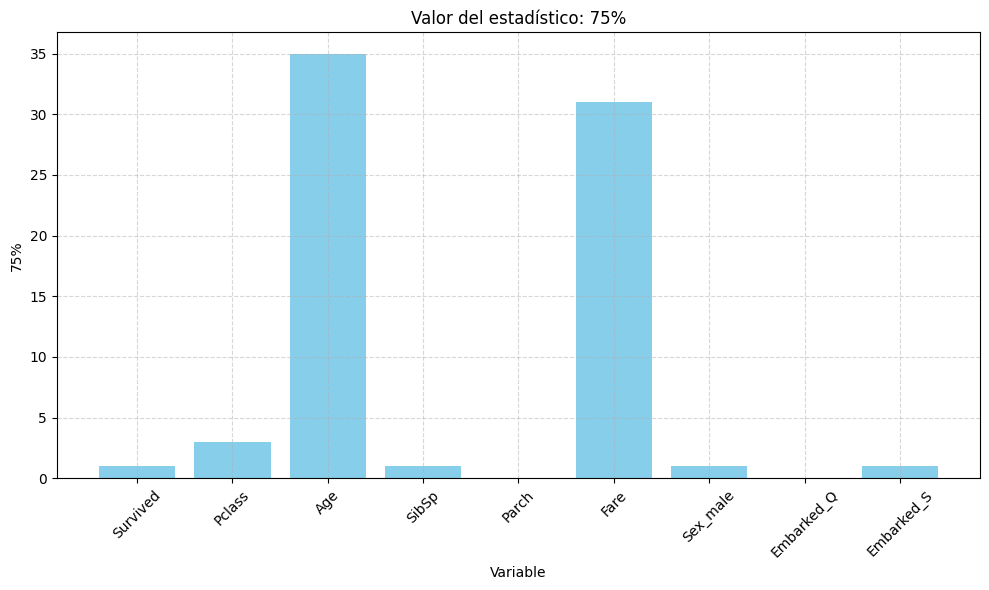

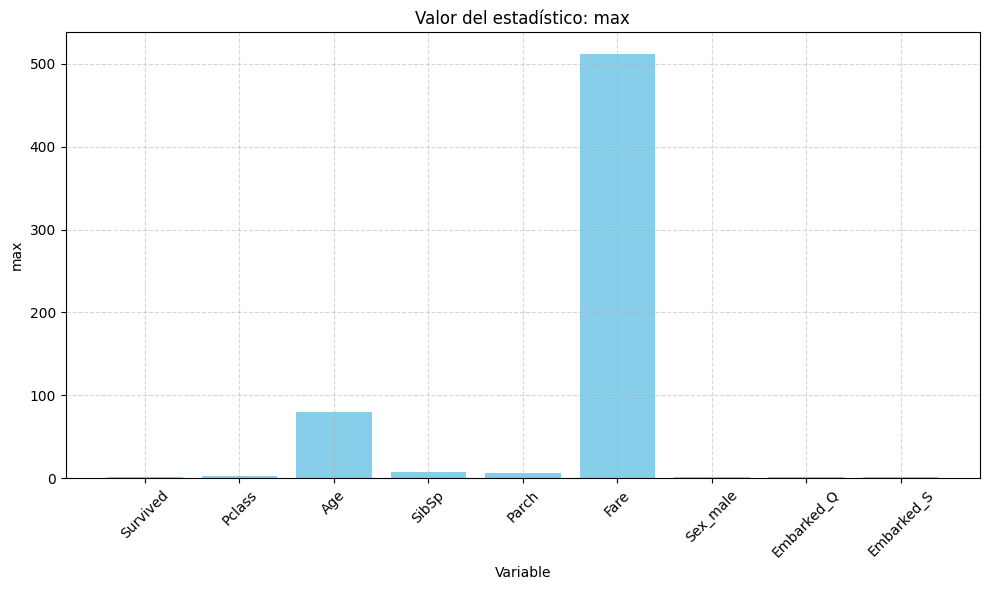

In [112]:
import matplotlib.pyplot as plt

# Lista de estadísticos a graficar
estadisticos_a_graficar = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

for estadistico in estadisticos_a_graficar:
    plt.figure(figsize=(10, 6))
    plt.bar(estadisticos.index, estadisticos[estadistico], color='skyblue')
    plt.xticks(rotation=45)
    plt.title(f'Valor del estadístico: {estadistico}')
    plt.ylabel(estadistico)
    plt.xlabel('Variable')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [113]:
# Filtrar las columnas categóricas (tipo object o dummy variables)
columnas_categoricas = df.select_dtypes(include=['object', 'uint8', 'bool']).columns

# Mostrar frecuencias para cada categoría
for col in columnas_categoricas:
    print(f"\nFrecuencia de categorías en '{col}':")
    print(df[col].value_counts())


In [114]:
# Filtrar las columnas categóricas (tipo object o dummy variables)
columnas_categoricas = df.select_dtypes(include=['object', 'uint8', 'bool']).columns

# Mostrar frecuencias para cada categoría
for col in columnas_categoricas:
    print(f"\nFrecuencia de categorías en '{col}':")
    print(df[col].value_counts())

for col in columnas_categoricas:
    plt.figure(figsize=(8, 5))
    conteo = df[col].value_counts()
    sns.barplot(x=conteo.index, y=conteo.values, palette='Set2')
    plt.title(f'Frecuencia de categorías en "{col}"')
    plt.ylabel('Frecuencia')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
